### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [56]:
# import requests and json
import requests
import json

# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "W60qxucogH1vZyOK9l6VMluAcFHnUvY5"
offset = str(1)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=W60qxucogH1vZyOK9l6VMluAcFHnUvY5&offset=1&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [57]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [58]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1606244494',
  'comments': [{'commentID': 107564884,
    'status': 'approved',
    'commentSequence': 107564884,
    'userID': 11023059,
    'userDisplayName': 'Vicki From Vermont',
    'userLocation': 'Vermont',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': 'Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has

In [67]:
# isolate just the comments dictionary
comms = data['results']['comments']
comms

[{'commentID': 107564884,
  'status': 'approved',
  'commentSequence': 107564884,
  'userID': 11023059,
  'userDisplayName': 'Vicki From Vermont',
  'userLocation': 'Vermont',
  'userTitle': 'NULL',
  'userURL': 'NULL',
  'picURL': None,
  'commentTitle': '<br\\//>',
  'commentBody': 'Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has perpetuated white supremacy ideology, mass incarceration, organized housing and employment discrimination and much evil. Historically the US has called on its fellow citizens of color to defend it in two world wars, the Vietnam war and more only to

In [68]:
comments = [ sub['commentBody'] for sub in comms ]
comments

['Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has perpetuated white supremacy ideology, mass incarceration, organized housing and employment discrimination and much evil. Historically the US has called on its fellow citizens of color to defend it in two world wars, the Vietnam war and more only to bring them to bases named after Civil War people whose ideology would place them as disposable second class citizens. It is all Shameful. We should not erect monuments to those who warred against the United States and worked for its destruction.',
 'In the outskirts of the city of B

In [71]:
# look at just one of the comments
one_comment = comments[18]
print(one_comment)

Can we get over Christopher Columbus?  A ship's captain, he ruled over a crew that would have been whipped and even worse in order to maintain discipline - virtually every captain would have been a tyrant on his boat.  And encounters with the natives - by virtually every explorer, were fraught.  And yes, the captain would have used violence to control the natives.  Again, most voyages to the new world featured similar violence.  

Columbus was a brave sailor whose legacy is the mixing of the old and new world.  He did not create the violent late medieval worlds that he came from.  Spain had just freed itself from the Islam with violence.  

We need to separate our current views from the norms of 1492.  If Columbus disappeared the next sailor who landed would have done the same (and in fact, they did - in Mexico and elsewhere).


In [98]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this
txt_lower = one_comment.lower()
txt_cln = txt_lower.replace(',','').replace('.','').replace('"','').replace('-','').replace('(','').replace(')','').replace('?','')
print(txt_cln)

can we get over christopher columbus  a ship's captain he ruled over a crew that would have been whipped and even worse in order to maintain discipline  virtually every captain would have been a tyrant on his boat  and encounters with the natives  by virtually every explorer were fraught  and yes the captain would have used violence to control the natives  again most voyages to the new world featured similar violence  

columbus was a brave sailor whose legacy is the mixing of the old and new world  he did not create the violent late medieval worlds that he came from  spain had just freed itself from the islam with violence  

we need to separate our current views from the norms of 1492  if columbus disappeared the next sailor who landed would have done the same and in fact they did  in mexico and elsewhere


In [81]:
# split text into list
txt_data = txt_clean.split()
# create a dictionary of word frequencies!
wordcount = {}
# go through each word in text_data
for word in txt_data:
    # if the word isn't in the dictionary, add it as a key AND give it a value of 1
    if word not in wordcount.keys():
        wordcount[word] = 1
    # if the word IS in the dictionary, add 1 to the value
    else:
        wordcount[word] += 1
print(wordcount)

{'can': 1, 'we': 2, 'get': 1, 'over': 2, 'christopher': 1, 'columbus?': 1, 'a': 4, "ship's": 1, 'captain': 3, 'he': 3, 'ruled': 1, 'crew': 1, 'that': 2, 'would': 4, 'have': 4, 'been': 2, 'whipped': 1, 'and': 5, 'even': 1, 'worse': 1, 'in': 3, 'order': 1, 'to': 4, 'maintain': 1, 'discipline': 1, '-': 3, 'virtually': 2, 'every': 2, 'tyrant': 1, 'on': 1, 'his': 1, 'boat': 1, 'encounters': 1, 'with': 2, 'the': 11, 'natives': 2, 'by': 1, 'explorer': 1, 'were': 1, 'fraught': 1, 'yes': 1, 'used': 1, 'violence': 3, 'control': 1, 'again': 1, 'most': 1, 'voyages': 1, 'new': 2, 'world': 2, 'featured': 1, 'similar': 1, 'columbus': 2, 'was': 1, 'brave': 1, 'sailor': 2, 'whose': 1, 'legacy': 1, 'is': 1, 'mixing': 1, 'of': 2, 'old': 1, 'did': 2, 'not': 1, 'create': 1, 'violent': 1, 'late': 1, 'medieval': 1, 'worlds': 1, 'came': 1, 'from': 3, 'spain': 1, 'had': 1, 'just': 1, 'freed': 1, 'itself': 1, 'islam': 1, 'need': 1, 'separate': 1, 'our': 1, 'current': 1, 'views': 1, 'norms': 1, '1492': 1, 'if': 

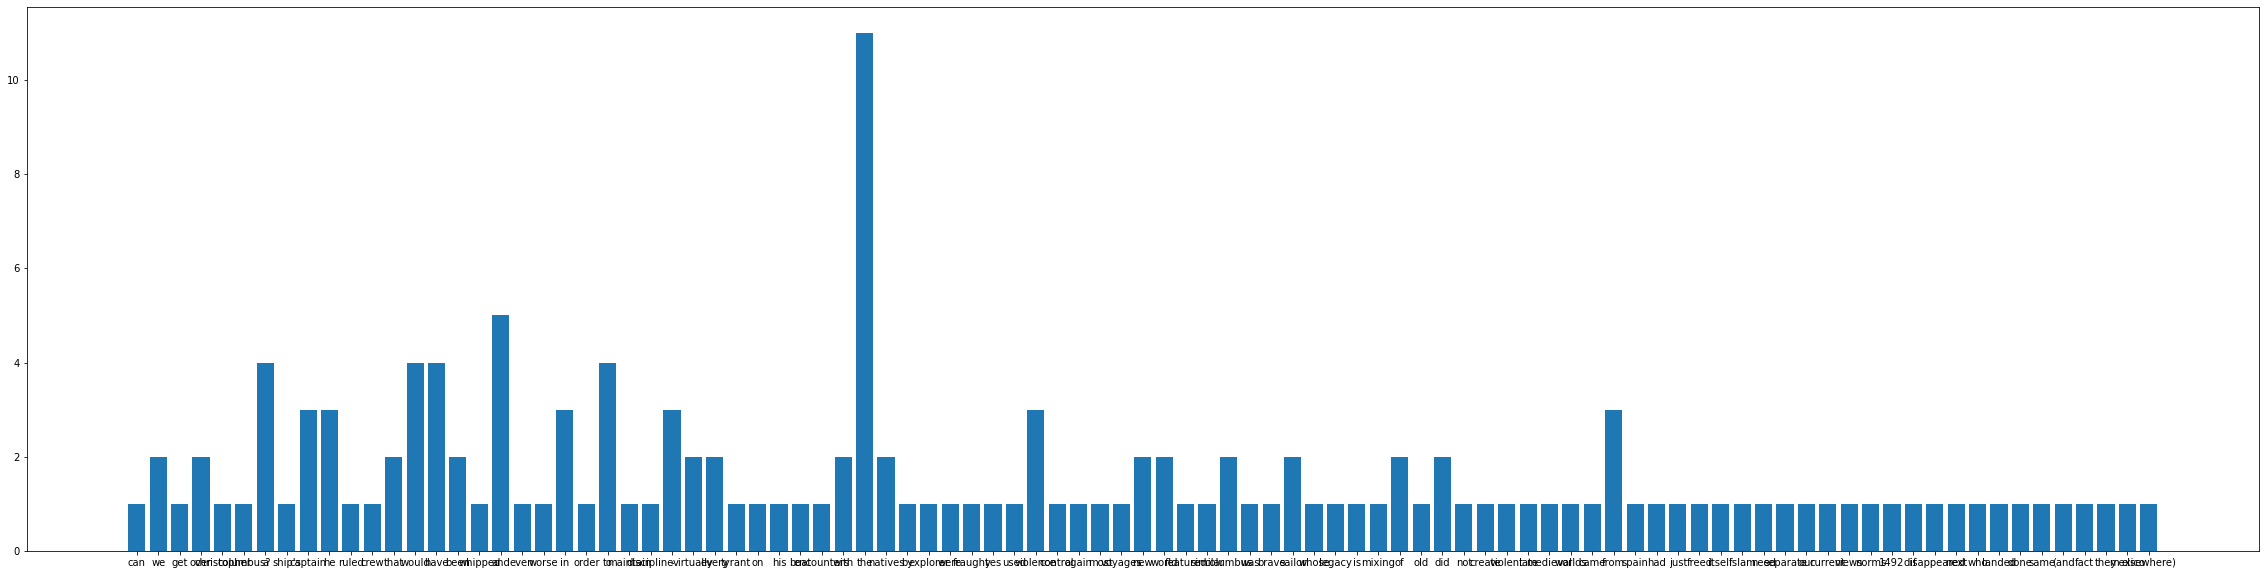

In [97]:
# try and plot out a chart of the dictionary we just created!
import matplotlib.pyplot as plt

keys = wordcount.keys()
values = wordcount.values()

fig= plt.figure(figsize=(40,10))
plt.bar(keys, values)

plt.show()